Data Pre-processing using Python

Perform the below steps on the data before loading the dataset into Tableau Public

• Display the summary statistics of the dataset

• Identify the outliers in the dataset (if there any)

• Identify the missing values in the dataset and display the count of missing values

• Perform data imputation, using whichever method suits most logically for the given columns in the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             9995 non-null   object 
 9   Region                    10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  Months_Inactive_12_mon    10127 non-null  int64  
 13  Contacts_Count_12_mon     10127 non-null  int64  
 14  Credit

### Interpretation
There are 20 columns: 7 categorical and 13 numerical

# Summary Satistic

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.638225e+01,8.341393e+00,18.0,4.100000e+01,4.600000e+01,5.200000e+01,8.900000e+01
Dependent_count,10127.0,2.787400e+00,6.479135e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.430000e+02
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10067.0,8.703181e+03,9.190059e+03,1438.3,2.555500e+03,4.557000e+03,1.112750e+04,3.466400e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


# OUTLIERS ANALYSIS

In [5]:
def hist_box(col):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    plt.title(f'{col}- Histogram')
    sns.histplot(data[col],kde=True)

    plt.subplot(1,2,2)
    plt.title(f'{col}- BoxPlot')
    sns.boxplot(x=data[col],color='green',whis=True,fliersize=5)
    plt.show()

In [6]:
numerical_col=data.select_dtypes(exclude='object').columns

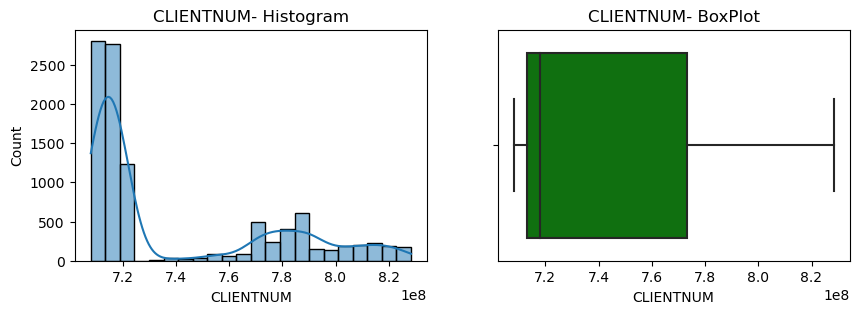

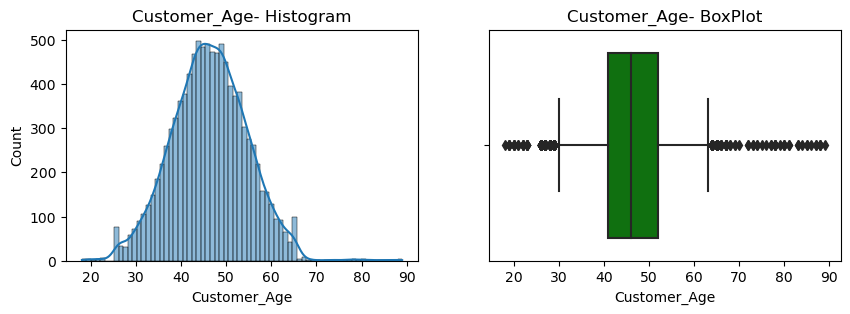

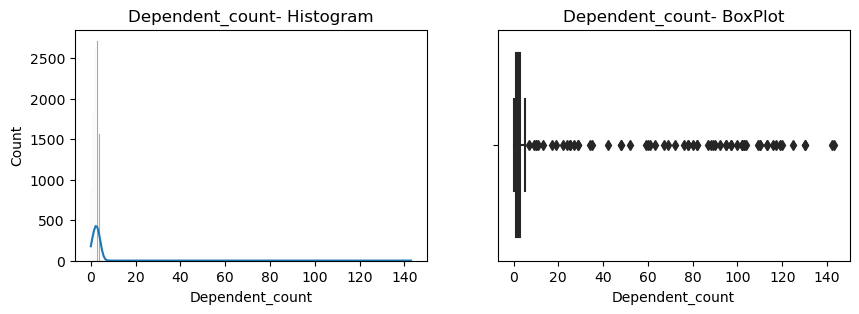

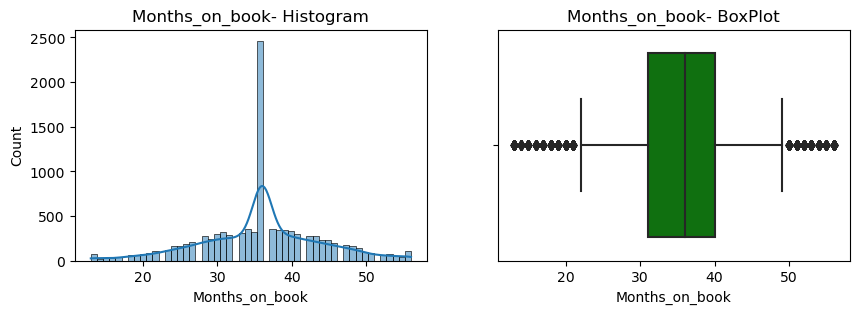

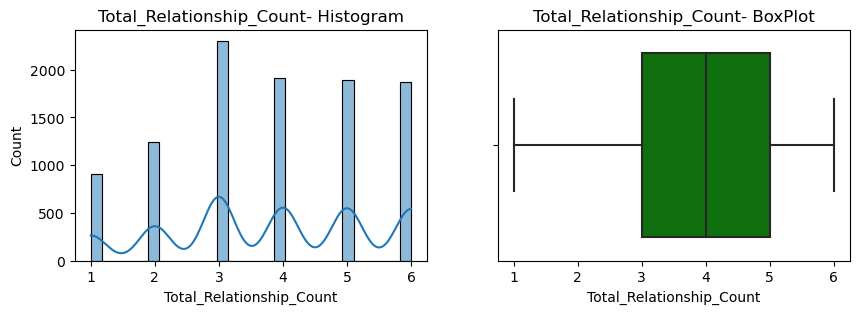

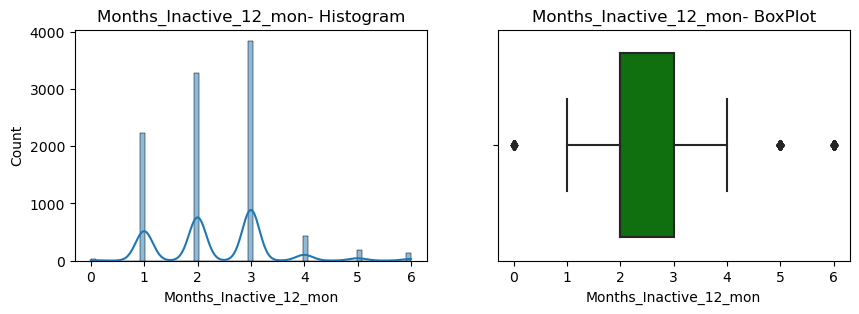

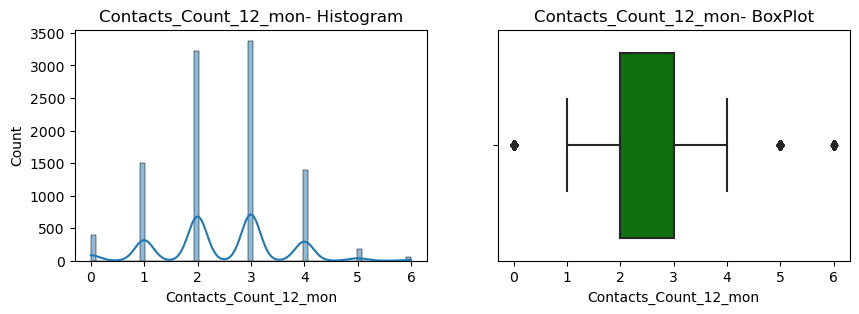

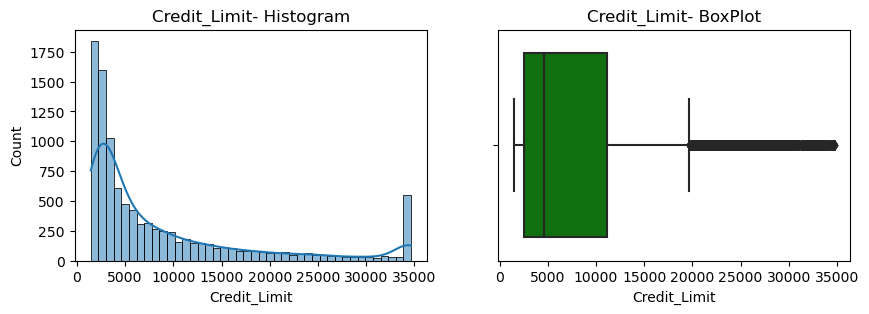

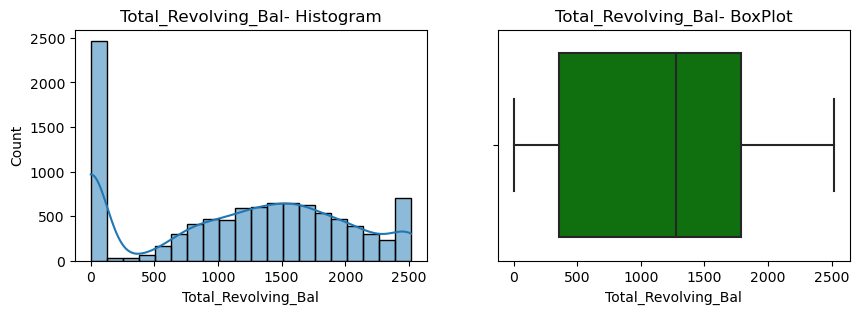

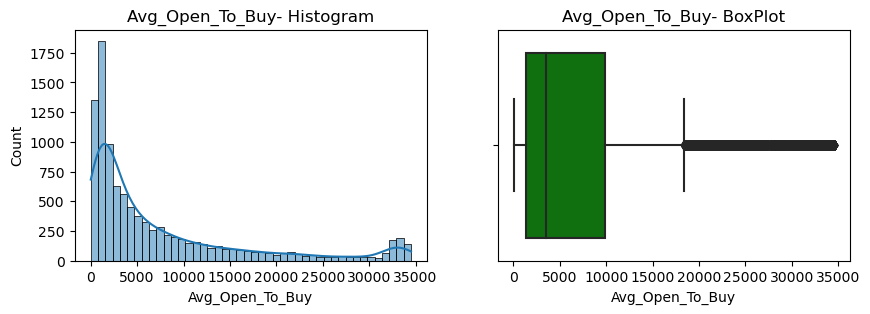

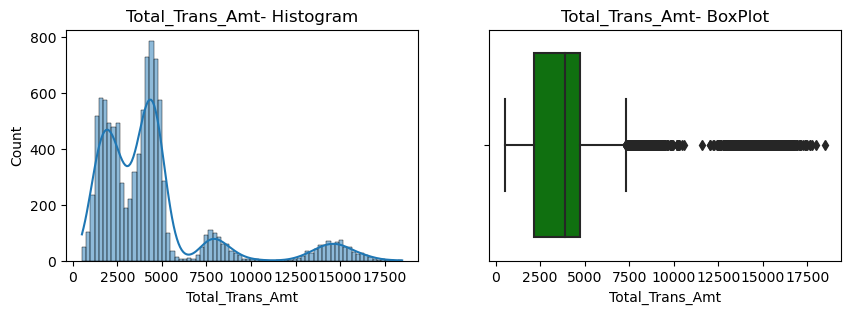

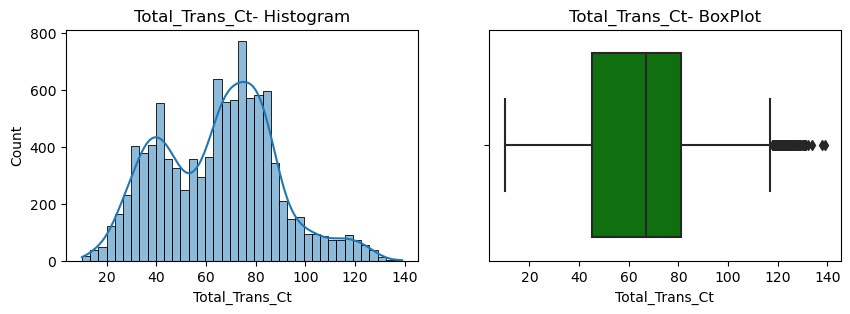

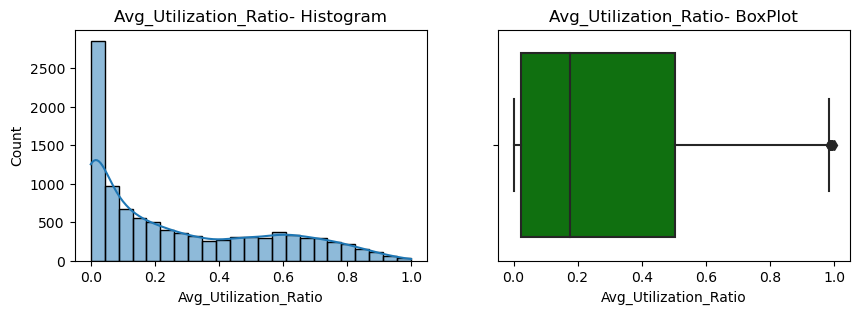

In [7]:
for i in numerical_col:
    hist_box(i)

# Outliers in Customer Age
        Dependent Count 
        Months on book
        Credit limit
        AverageOpen to Buy
        Total trans Amt
        Total trans ct
        Avg Utilization ratio


# MISSING VALUES

In [8]:
data.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

### Interpretation
1. _Card_category has 132 null values and is of object data type . So, it will be replaced with the Mode value_
2. _Credit Limit has 60 null values and is of numerical datatype. So, it will be replaced with the Mode_


In [9]:
# Card_category 
data.Card_Category.fillna(data.Card_Category.mode()[0],inplace=True)
# Credit_Limit
data.Credit_Limit.fillna(np.round(data.Credit_Limit.mean(),1),inplace=True)

#### Verify Null values

In [10]:
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
columns=data.select_dtypes(exclude='object')

In [16]:
iqr_df=pd.DataFrame(index=['Mean','Median','Mode','Min','LowerBound','Q1','Q3','IQR','UpperBound','Max'])

def iqr(col):
    mean=data[col].mean()
    median=data[col].median()
    mode=data[col].mode()[0]
    min=data[col].min()
    
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    LowerBound=Q1-1.5*IQR
    UpperBound=Q3+1.5*IQR
    max=data[col].max()
    
    ins=[mean,median,mode,min,LowerBound,Q1,Q3,IQR,UpperBound,max]

    iqr_df.insert(len(iqr_df.columns),column=f'{col}',value=ins)
    

for i in columns:
    iqr(i)
display(iqr_df)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Mean,7.391776e+08,46.382245,2.7874,35.928409,3.81258,2.341167,2.455317,8703.180666,1162.814061,7469.139637,4404.086304,64.858695,0.274894
Median,7.179264e+08,46.000000,2.0000,36.000000,4.00000,2.000000,2.000000,4597.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
Mode,7.080821e+08,44.000000,3.0000,36.000000,3.00000,3.000000,3.000000,34516.000000,0.000000,1438.300000,4253.000000,81.000000,0.000000
Min,7.080821e+08,18.000000,0.0000,13.000000,1.00000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
LowerBound,6.228766e+08,24.500000,-2.0000,17.500000,0.00000,0.500000,0.500000,-10214.750000,-1778.500000,-11477.250000,-1722.750000,-9.000000,-0.697000
Q1,7.130368e+08,41.000000,1.0000,31.000000,3.00000,2.000000,2.000000,2563.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
Q3,7.731435e+08,52.000000,3.0000,40.000000,5.00000,3.000000,3.000000,11081.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
IQR,6.010676e+07,11.000000,2.0000,9.000000,2.00000,1.000000,1.000000,8518.500000,1425.000000,8534.500000,2585.500000,36.000000,0.480000
UpperBound,8.633037e+08,68.500000,6.0000,53.500000,8.00000,4.500000,4.500000,23859.250000,3921.500000,22660.750000,8619.250000,135.000000,1.223000
Max,8.283431e+08,89.000000,143.0000,56.000000,6.00000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


In [17]:
def remove_outliers(df, columns):
    df_no_outliers = df.copy()

    for col in columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        LowerBound = Q1 - 1.5 * IQR
        UpperBound = Q3 + 1.5 * IQR

        df_no_outliers = df_no_outliers[(df_no_outliers[col] > LowerBound) & (df_no_outliers[col] < UpperBound)]

    return df_no_outliers


In [18]:
data_no_outlier=remove_outliers(data,columns)

In [20]:
display(data.shape)
display(data_no_outlier.shape)

(10127, 20)

(7221, 20)

In [22]:
data.to_csv('BankChurn_Data_Preprocessed.csv')